# IBM HR Analytics Employee Attrition & Performance

In [43]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [44]:


original = pd.read_csv('HR Employee Attrition.csv')


In [45]:


data = original.copy()


In [46]:
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Data Exploration and Cleaning

In [47]:


pd.set_option('display.max_columns',None)
data.sample(3)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
705,39,No,Travel_Rarely,903,Sales,2,5,Life Sciences,1,985,1,Male,41,4,3,Sales Executive,3,Single,7880,2560,0,Y,No,18,3,4,80,0,9,3,3,8,7,0,7
517,25,No,Travel_Rarely,810,Sales,8,3,Life Sciences,1,707,4,Male,57,4,2,Sales Executive,2,Married,4851,15678,0,Y,No,22,4,3,80,1,4,4,3,3,2,1,2
1014,31,No,Travel_Rarely,182,Research & Development,8,5,Life Sciences,1,1430,1,Female,93,3,4,Research Director,2,Single,16422,8847,3,Y,No,11,3,3,80,0,9,3,4,3,2,1,0


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**Initital Insgihts:**

- Dataset contains no Null Values
- All of the Coulumns have correct Datatype.
- Columns like 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsAtCompany' might be highly corelated to each other. We'll check that is Data Preprocessing.

In [49]:


print(f"\nThe Dataset Contains {data.shape[0]} rows and {data.shape[1]} columns\n")



The Dataset Contains 1470 rows and 35 columns



In [50]:

print("\nDataset has Null Values: ",data.isnull().sum().any(),"\n")


Dataset has Null Values:  False 



In [51]:
print("\nDataset has Duplicated Values: ",data.duplicated().sum().any(),"\n")


Dataset has Duplicated Values:  False 



In [52]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


## Initial Analysation

- 50% of the employees have the distance from home as less than 7 kms  ✔️
- Employee Count is of no use as it only contains ->  1 value.   ✔️
- Employee number is similar to Employee ID and can be dropped  ✔️
- 50% of the employees have higher very high Environmental and Job Satisfaction   ✔️
- NumCompaniesWorked column may have the right skewed data_eda, 75% of the employees have worked in less then 4 companies
- Over18 column only contains the Y value so it must be dropped  ✔️
- Almost 75% of the PerformanceRating are 3 and rest are 4. No 1 and 2 Ratings are detected.
- StandardHours in all cases are 80. So it must be dropped.     ✔️
- TotalWorkingYears may contain potential outliers or the data_eda my be skewed.
- 

In [53]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [54]:
data.drop(columns=['EmployeeCount','Over18','StandardHours','EmployeeNumber'], axis = 1, inplace=True)

All of the above columns have almost only one value or the values that will not be beneficial for our analysis or model building, so it is better to drop them...

In [55]:
data.columns = data.columns.str.strip()

data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [56]:
cleaned_data = data.copy()

## Data Analysis

-------------------------------------------------- 
 Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64 
 --------------------------------------------------

Most of the Employees in the dataset are from the Resarch and Development Department(nearly 65%.
followed by Sales Department that has almost 30% of the total Employees. Human Resources Department has least number of employees(around 4.3%)


From the second graph around 14% of the Research and Development department have attrited and in sales department, there is around 20% Attrition rate which is relatively higher than the R & D department... In case of Human Resource, around 19% of the emplyees have attrited.


So, in cunclusion Research and Development department have the lowest Attrition rate among all the deparments. While Sales and Human Resource have almost similar attrition rate i.e 20%


-------------------------------------------------- 
 Attriti

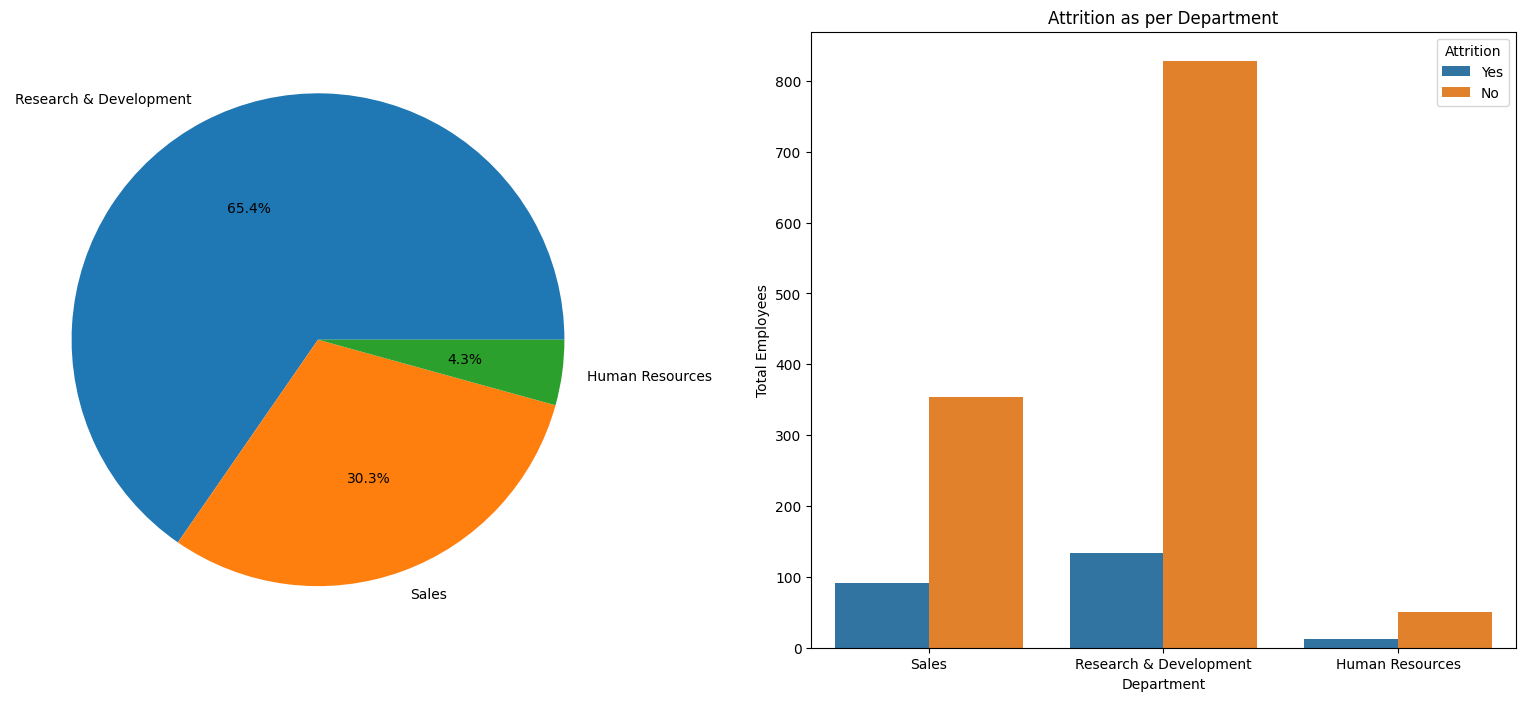

In [57]:
# print("-"*50,"\n",data.groupby('Department')['Attrition'].count(),"\n","-"*50)
print("-"*50,"\n",data['Department'].value_counts(),"\n","-"*50)

print("\nMost of the Employees in the dataset are from the Resarch and Development Department(nearly 65%.\n\
followed by Sales Department that has almost 30% of the total Employees. Human Resources Department has \
least number of employees(around 4.3%)\n\n")

print('From the second graph around 14% of the Research and Development department have attrited and in \
sales department, there is around 20% Attrition rate which is relatively higher than the R & D department... In case \
of Human Resource, around 19% of the emplyees have attrited.\n\n')

print('So, in cunclusion Research and Development department have the lowest Attrition rate among all the deparments. \
While Sales and Human Resource have almost similar attrition rate i.e 20%\n\n')

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.pie(data['Department'].value_counts(),
       labels=data['Department'].value_counts().index,
        autopct='%1.1f%%')
plt.plot()


plt.subplot(1,2,2)
sns.countplot(data=data,x='Department', hue = 'Attrition')
plt.title('Attrition as per Department')
plt.xlabel('Department')
plt.ylabel('Total Employees')


print("-"*50,"\n",pd.crosstab(data['Department'],data['Attrition']),"\n","-"*50)

 `

Creating a new feature Age_Bins that groups the age in different bins. It would be helpful for further analysis and may improve the model performance in future.

In [58]:
#          -------------- Creating bins of Age coulmn   -------------------



# from sklearn.preprocessing import KBinsDiscretizer
# kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform' )
# data['Age_Bins']= kbins.fit_transform(data[['Age']])




bins=[17,28,38,48,58,100]
labels = ['18-28','29-38','39-48','49-58','59+']
data['Age_Bins'] = pd.cut(data['Age'],bins=bins,labels=labels, include_lowest=True)

Attrition Percentage Rate as per the age

   Age_Group  Percentage
0     29-38       42.62
1     18-28       30.80
2     39-48       16.03
3     49-58       10.55
4       59+        0.00


Here we can see that the Age group of 29-38 and 18-28 has the large number of Attrition rate of 42% and 30% respectively compared to the 39-48 and 49-58 that has 16 and 10% of the attrition rate respectively.Moreover we can see that there are no Attrition of the people above 59...


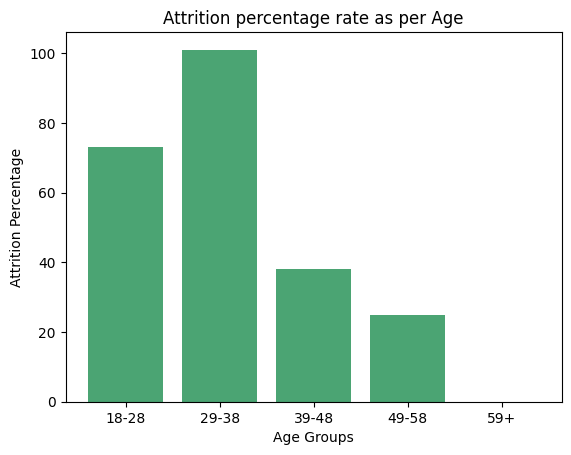

In [59]:
Total_left = data[data['Attrition'] == 'Yes']['Age_Bins'].value_counts()
AgeGroupPer = pd.DataFrame(np.round((Total_left/Total_left.sum()*100),2)).reset_index()
AgeGroupPer.columns=['Age_Group','Percentage']

print("Attrition Percentage Rate as per the age\n\n",AgeGroupPer)

sns.barplot(Total_left,color='mediumseagreen')
plt.title('Attrition percentage rate as per Age')
plt.xlabel('Age Groups')
plt.ylabel('Attrition Percentage')
plt.plot()

print('\n\nHere we can see that the Age group of 29-38 and 18-28 has the large number of Attrition rate of 42% and 30% respectively \
compared to the 39-48 and 49-58 that has 16 and 10% of the attrition rate respectively.\
Moreover we can see that there are no Attrition of the people above 59...')


Creating a new feature Age_Bins that groups the age in different bins. It would be helpful for further analysis and may improve the model performance in future.

We will Encode the Age_Bins collumns then check if it will improve our model performance or not

It is clear that most of the people are satisfied with the Job and less number of the people are moderately or less satisfied with the Job. Same goes with the Environmental Satisfaction


[]

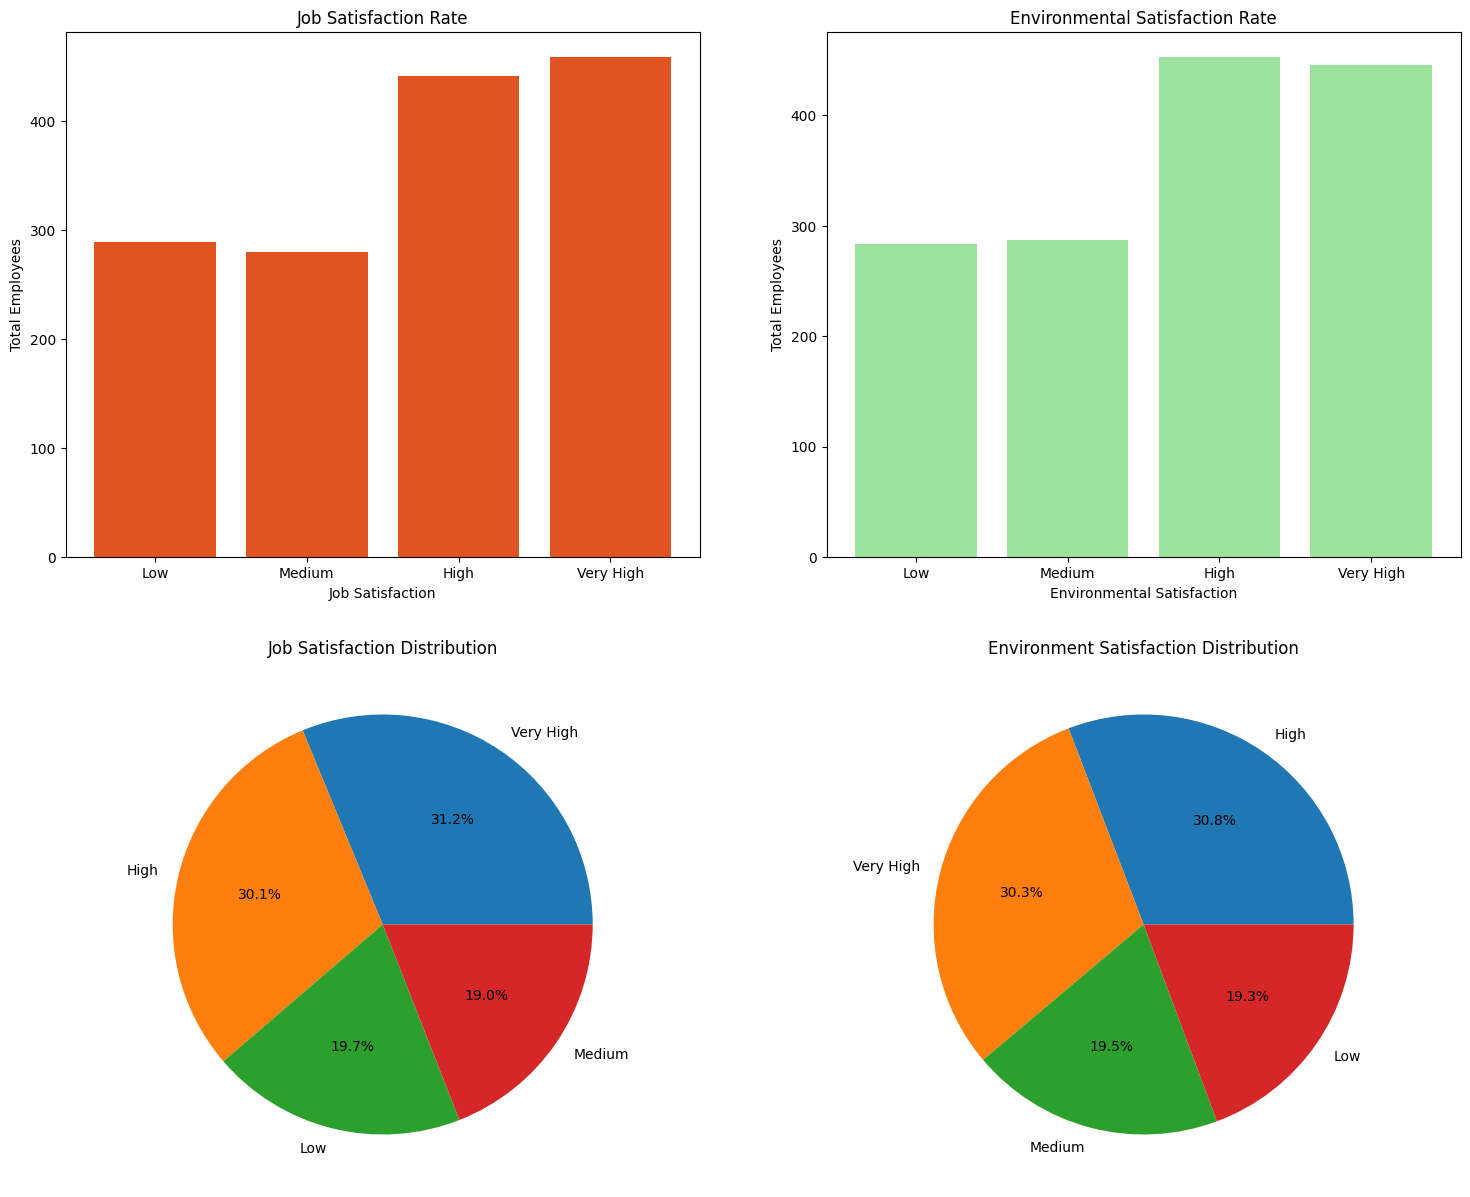

In [60]:

print('It is clear that most of the people are satisfied with the Job and less number of the people are\
 moderately or less satisfied with the Job. Same goes with the Environmental Satisfaction')


plt.figure(figsize=(18,15))
plt.subplot(2,2,1)
sns.barplot(data['JobSatisfaction'].value_counts(),color='orangered')
plt.xlabel('Job Satisfaction')
plt.title('Job Satisfaction Rate')
plt.ylabel('Total Employees')
plt.xticks([0,1,2,3],['Low','Medium','High','Very High'])
plt.plot()



plt.subplot(2,2,2)
sns.barplot(data['EnvironmentSatisfaction'].value_counts(),color='lightgreen')
plt.xlabel('Environmental Satisfaction')
plt.title('Environmental Satisfaction Rate')
plt.ylabel('Total Employees')
plt.xticks([0,1,2,3],['Low','Medium','High','Very High'])
plt.plot()





plt.subplot(2,2,3)
plt.pie(data['JobSatisfaction'].value_counts(),
       labels=['Very High','High','Low','Medium'],
        autopct='%1.1f%%'
       )
plt.title("Job Satisfaction Distribution")
plt.plot()





plt.subplot(2,2,4)
plt.pie(data['EnvironmentSatisfaction'].value_counts(),
       labels=['High','Very High','Medium','Low'],
        autopct='%1.1f%%'
       )
plt.title("Environment Satisfaction Distribution")
plt.plot()

Similarly we can check the Environmental and Job Satisfaction in case of Attrited Customers

[]

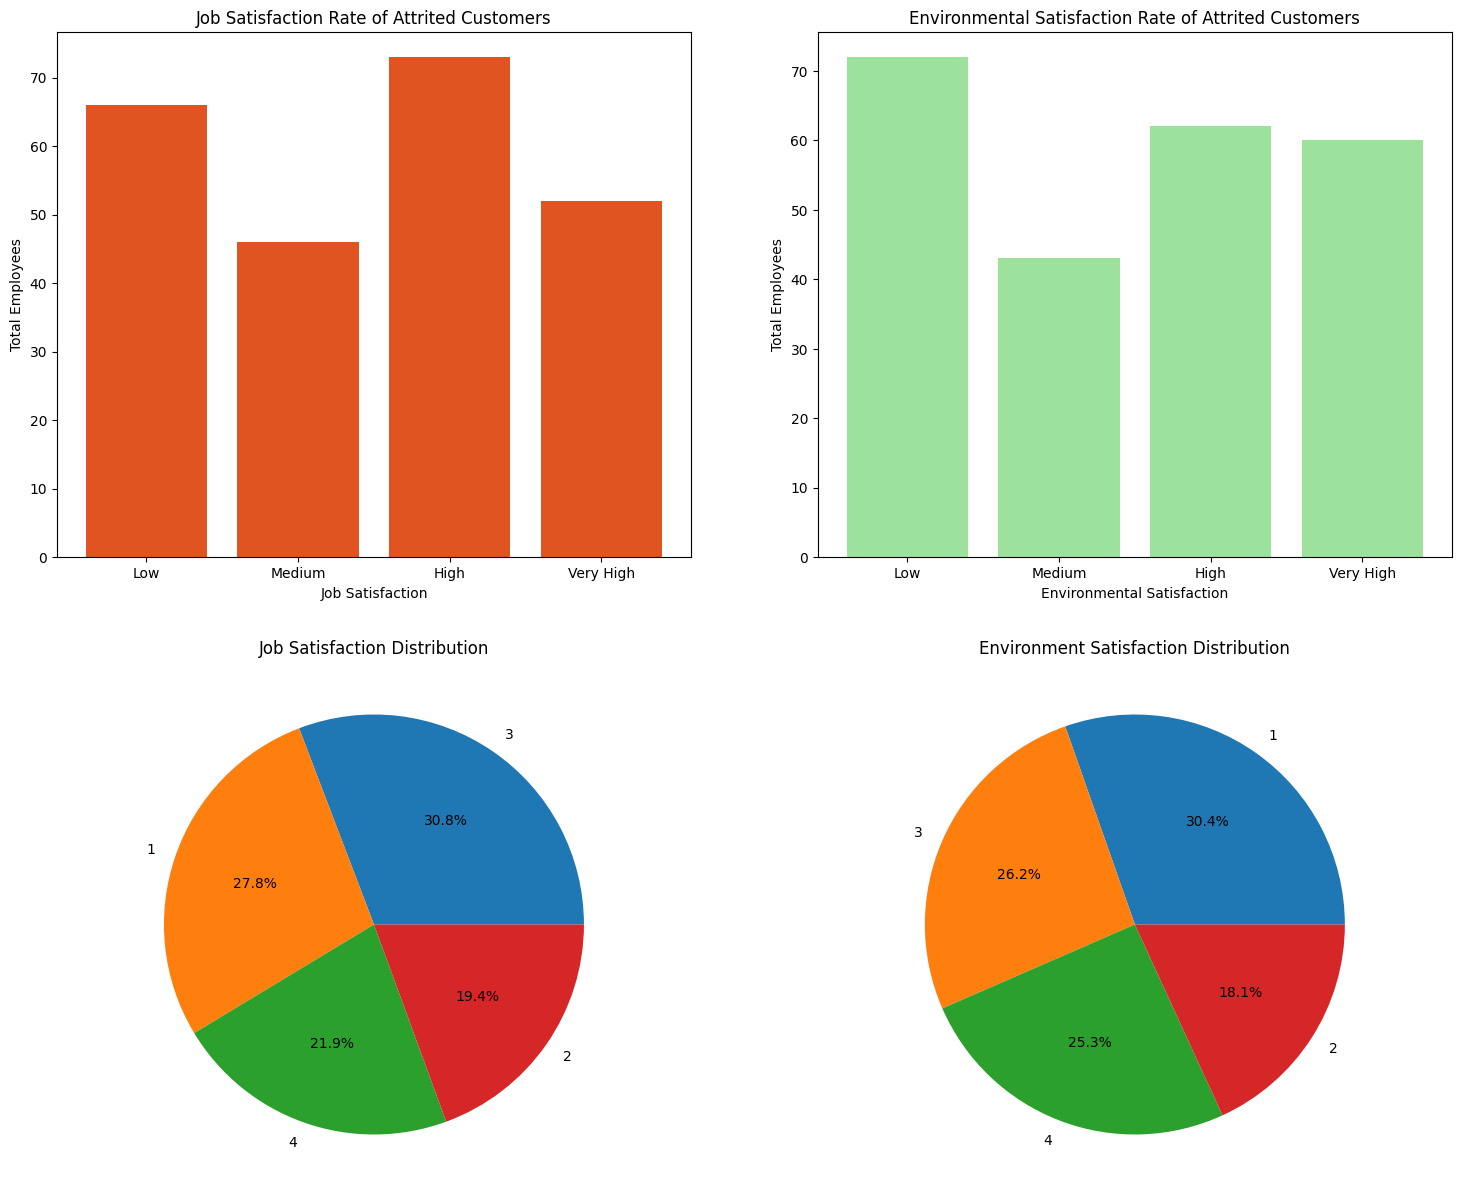

In [61]:

#print('It is clear that most of the people are satisfied with the Job and less number of the people are\
# moderately or less satisfied with the Job. Same goes with the Environmental Satisfaction')


plt.figure(figsize=(18,15))
plt.subplot(2,2,1)
sns.barplot(data[data['Attrition']=='Yes']['JobSatisfaction'].value_counts(),color='orangered')
plt.xlabel('Job Satisfaction')
plt.title('Job Satisfaction Rate of Attrited Customers')
plt.ylabel('Total Employees')
plt.xticks([0,1,2,3],['Low','Medium','High','Very High'])
plt.plot()



plt.subplot(2,2,2)
sns.barplot(data[data['Attrition']=='Yes']['EnvironmentSatisfaction'].value_counts(),color='lightgreen')
plt.xlabel('Environmental Satisfaction')
plt.title('Environmental Satisfaction Rate of Attrited Customers')
plt.ylabel('Total Employees')
plt.xticks([0,1,2,3],['Low','Medium','High','Very High'])
plt.plot()





plt.subplot(2,2,3)
plt.pie(data[data['Attrition']=='Yes']['JobSatisfaction'].value_counts(),
       labels=data[data['Attrition']=='Yes']['JobSatisfaction'].value_counts().index,
        autopct='%1.1f%%'
       )
plt.title("Job Satisfaction Distribution")
plt.plot()





plt.subplot(2,2,4)
plt.pie(data[data['Attrition']=='Yes']['EnvironmentSatisfaction'].value_counts(),
       labels=data[data['Attrition']=='Yes']['EnvironmentSatisfaction'].value_counts().index,
        autopct='%1.1f%%'
       )
plt.title("Environment Satisfaction Distribution")
plt.plot()



---------------------------------------------------------------------------------------------------- 
From the first graph we can see that the Attrition rate is comparitvely lower than non Attrition  (almost 80:20 ratio). The second graph shows number of Attrited and non Attrited Employees based on their Performance rating
 ----------------------------------------------------------------------------------------------------
Attrition            No  Yes
PerformanceRating           
3                  1044  200
4                   189   37


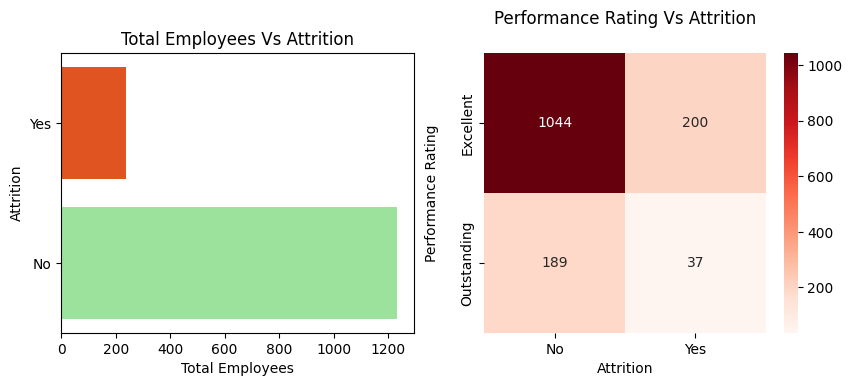

In [62]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,2)
sns.heatmap(pd.crosstab(data['PerformanceRating'],data['Attrition']),cmap='Reds',annot=True, fmt='.0f')
plt.title("Performance Rating Vs Attrition\n")
plt.yticks([0.5,1.5],['Excellent','Outstanding'])
plt.ylabel("Performance Rating\n")
plt.plot()
print('-' * 100,'\nFrom the first graph we can see that the Attrition rate is comparitvely lower than non Attrition \
 (almost 80:20 ratio). The second graph shows number of Attrited and non Attrited Employees based on their\
 Performance rating\n','-'*100)
print(pd.crosstab(data['PerformanceRating'],data['Attrition']))

plt.subplot(2,2,1)
sns.countplot(data['Attrition'],palette=['orangered','lightgreen'])
plt.title("Total Employees Vs Attrition")
plt.xlabel("Total Employees")
plt.show()

50% of the employees have the distance from home as less than 7 kms. There are fewer Employees that havea distance of greater than 11km


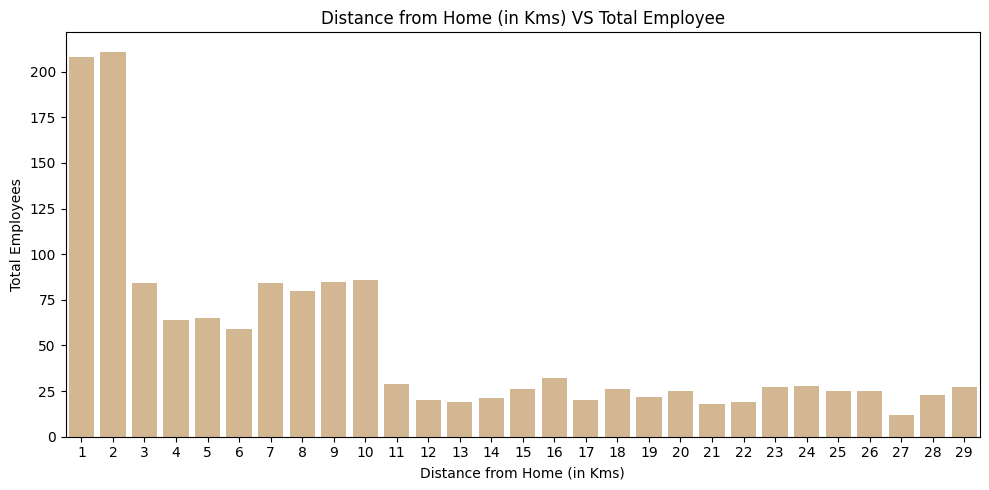

In [63]:
#    print(pd.dataFrame(data['DistanceFromHome'].value_counts().reset_index().rename(
#        columns={'DistanceFromHome':'Distance from Home (in Kms)','count':'Total Employees'})))


print('50% of the employees have the distance from home as less than 7 kms. There are fewer Employees that have\
a distance of greater than 11km')

plt.figure(figsize=(10, 5))


sns.barplot(data['DistanceFromHome'].value_counts().sort_index(),color='burlywood')
plt.title('Distance from Home (in Kms) VS Total Employee')
plt.xlabel('Distance from Home (in Kms)')
plt.ylabel('Total Employees')

plt.tight_layout()
plt.show()



75% of the employees have worked in less then 4 companies. Most of the Employees have worked in only one Company    before.


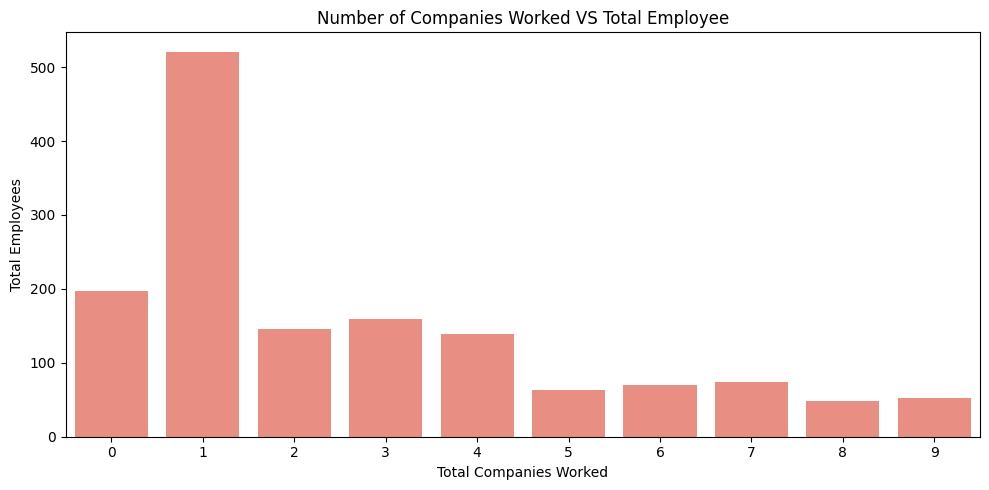

In [64]:

#    print(pd.dataFrame(data['NumCompaniesWorked'].value_counts().reset_index().rename(
#        columns={'NumCompaniesWorked':'Total Companies Worked','count':'Total Employees'})))


print('75% of the employees have worked in less then 4 companies. Most of the Employees have worked in only\
 one Company    before.')

plt.figure(figsize=(10, 5))


sns.barplot(data['NumCompaniesWorked'].value_counts().sort_index(),color='salmon')
plt.title('Number of Companies Worked VS Total Employee')
plt.xlabel('Total Companies Worked')
plt.ylabel('Total Employees')

plt.tight_layout()
plt.show()



## Feature Engineering

<Axes: xlabel='Attrition', ylabel='count'>

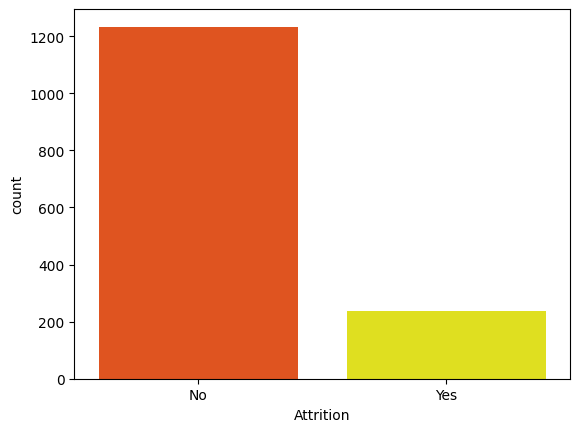

In [65]:
data["Attrition"].value_counts()

sns.barplot(data["Attrition"].value_counts(),palette=['orangered','yellow'])

We can see the data is clearly imbalanced, so we'll surely consider balanicing it before training the model. Or using the Weight parameter during Model Creation

Coverted Attrition column to Numeric  ->  Yes = 1  , No = 0

In [66]:

data["Attrition"] = data["Attrition"].map({'No':0,'Yes':1})



<Axes: >

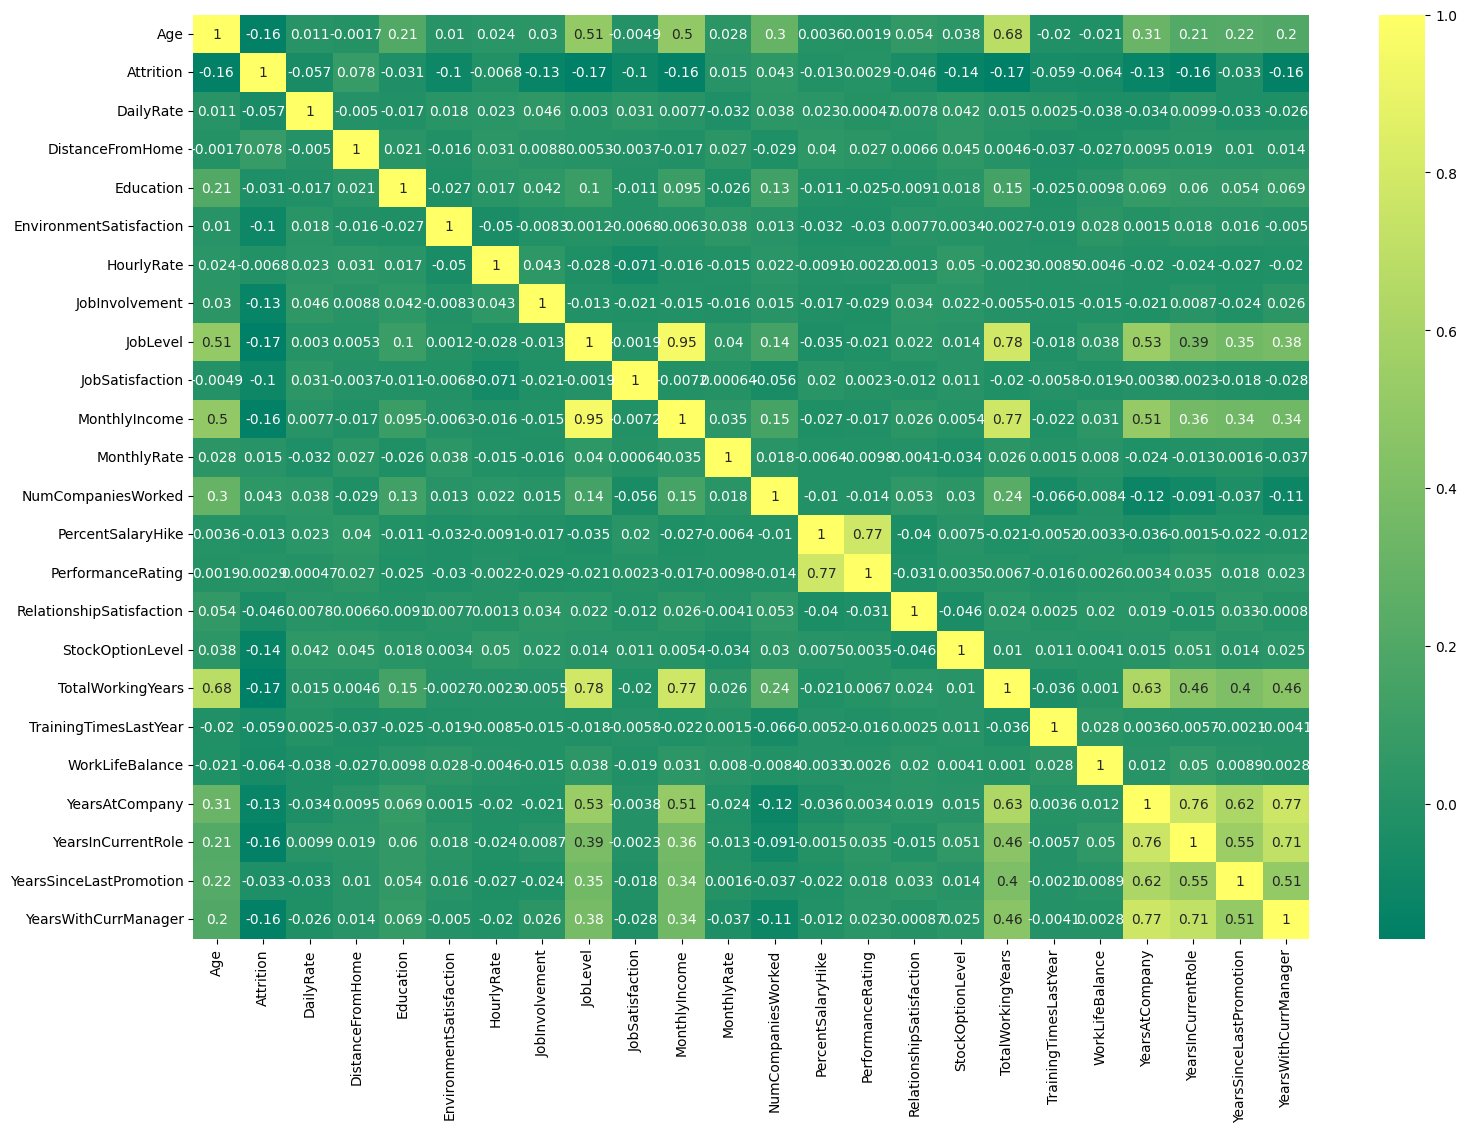

In [67]:
plt.figure(figsize=(18,12))

sns.heatmap(data.select_dtypes(include = 'number').corr(), annot=True, cmap='summer')

# ⚠️

A lot of columns are highly corelated to each other which may cause high colinearity... So droping them will be the wise decision for better model performance.


- The columns with the "YearsAt..." data are all almost similar.

- Monthly Income and Job Level are highly corelated... -> **Droping Job Level**

- **Dropping PerformanceRating** as PercentSalaryHike and PerformanceRating are highly corelated to each other.


#data_eda.drop(['JobLevel','PerformanceRating'],inplace=True,axis=1)

- We may consider it during Model Evaluation.

Creating separate dataset of Numerical and Categorical Columns

In [68]:

#      Numerical Columns:
num_cols = data.select_dtypes(include = 'number')

#     Categorical Columns:
cat_cols = data.select_dtypes(include = 'object')


In [69]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Age_Bins'],
      dtype='object')

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

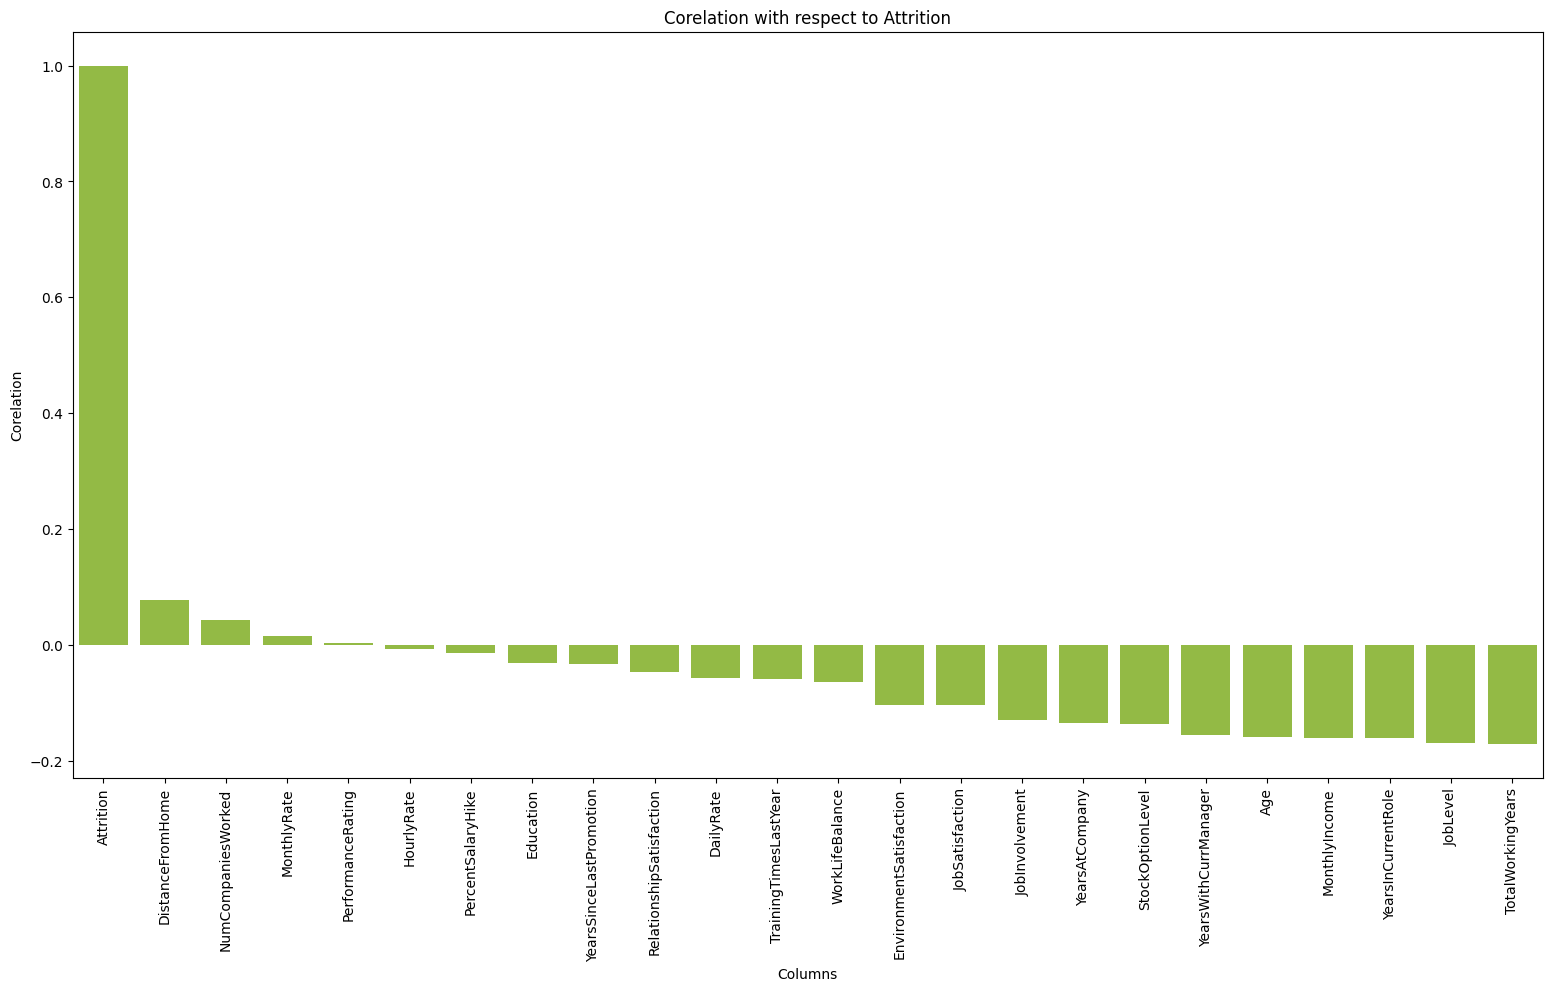

In [70]:
plt.figure(figsize=(16,8))


sns.barplot(data.corr(numeric_only=True)['Attrition'].sort_values(ascending = False), color='yellowgreen')
plt.tight_layout()

plt.title("Corelation with respect to Attrition")
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Corelation")
plt.plot

- People that live far from the company and have worked in multiple companies are most likely to attritate.
- People with Total Working Years as High and higher Job Leval and Monthly Income are less likely to attritate.

In [71]:
print("Corealation with respect to Attrition\n\n",data.corr(numeric_only=True)['Attrition'].sort_values(ascending = False))

Corealation with respect to Attrition

 Attrition                   1.000000
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
Name: Attrition, dtype: float64


# ⚠️

There is not much corelation of input featrues with the Output featrue and having a lot of Imbalance in the dataset, this dataset may not be good for model building. Linear Models may not perform well, we will try different Classififcation Models and Tree Based Model and compare all the Model's performance well.

If we use Logistic Regression to train the model in the future we may consider droppin these two columns as they have a colinearity  close to zero   ['PerformanceRating','HourlyRate']

In [72]:
cat_cols

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


All of the Categorical columns are Nominal.
So, we will use One Hot encoding to do the Encoding ( Coverting Categorical Columns to Numerical )


In [73]:
num_cols

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5
1,49,0,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,41,4,2,4,2571,12290,4,17,3,3,1,17,3,3,5,2,0,3
1466,39,0,613,6,1,4,42,2,3,1,9991,21457,4,15,3,1,1,9,5,3,7,7,1,7
1467,27,0,155,4,3,2,87,4,2,2,6142,5174,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,0,1023,2,3,4,63,2,2,2,5390,13243,2,14,3,4,0,17,3,2,9,6,0,8


The numerical columns are not in a proper scale. So we will consider using the StandardScaler or MinmaxScaler to scale the Numerical Data.

In [74]:
data.shape

(1470, 32)

## Data Preprocessing

For Model building, I will be using the new dataset to avoid the data leakage. We'll do all the necessary operation on this data as well.

In [75]:
data_model = original.copy()

In [76]:
##     ------              Dropping Unnecessary Columns...

data_model.drop(columns=['EmployeeCount','Over18','StandardHours','EmployeeNumber'], axis = 1, inplace=True)


In [77]:
##    ---------          Creating new Age_Bins Column...

bins=[17,28,38,48,58,100]
labels = ['18-28','29-38','39-48','49-58','59+']
data_model['Age_Bins'] = pd.cut(data_model['Age'],bins=bins,labels=labels, include_lowest=True)




In [78]:
##    ------------         Converting the Attrition Column to Numerical Form...

data_model["Attrition"] = data_model["Attrition"].map({'No':0,'Yes':1})




In [79]:



#  Creating Dataset of Numerical Columns only.

Num_Cols = data_model.select_dtypes(include='number').drop(columns=['Attrition'])

#  Creating Dataset of Categorical Columns only.

Cat_Cols = data_model.select_dtypes(include='object')




In [80]:
##    ------------         Changing Datatype of Age_Bins...



data_model['Age_Bins'] = data_model['Age_Bins'].astype('object')



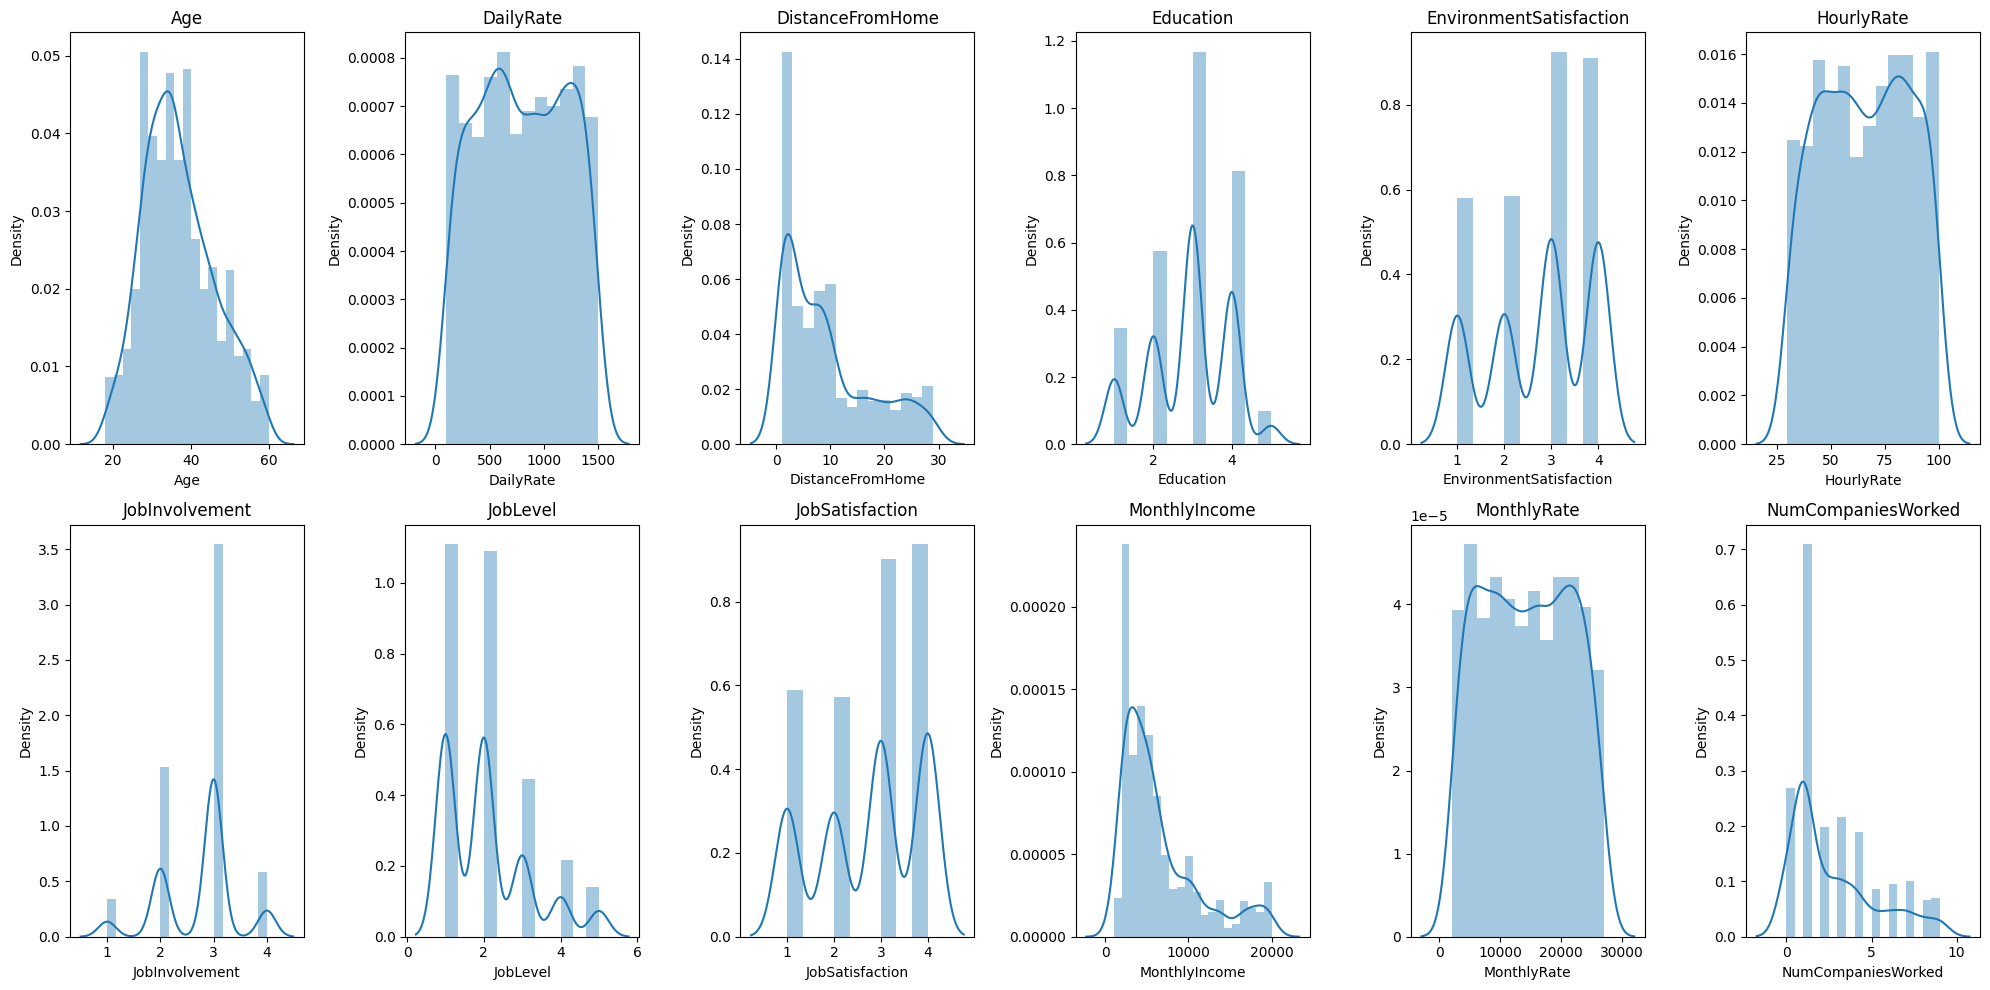

In [81]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index=0
ax=ax.flatten()


for col,value in Num_Cols.items():
    if index >= 12:
        break
    sns.distplot(value,ax=ax[index])
    ax[index].set_title(col)
    index+=1
    
plt.tight_layout()

As we can see above, some of the right skewed columns can be made Normally Distributed by using Log Transform...
We will check the effect of the distribution by using the log transform on such columns...

Also most of our Columns are almost Normally distributed, we may consider StandardScaler as our Scaling Method.

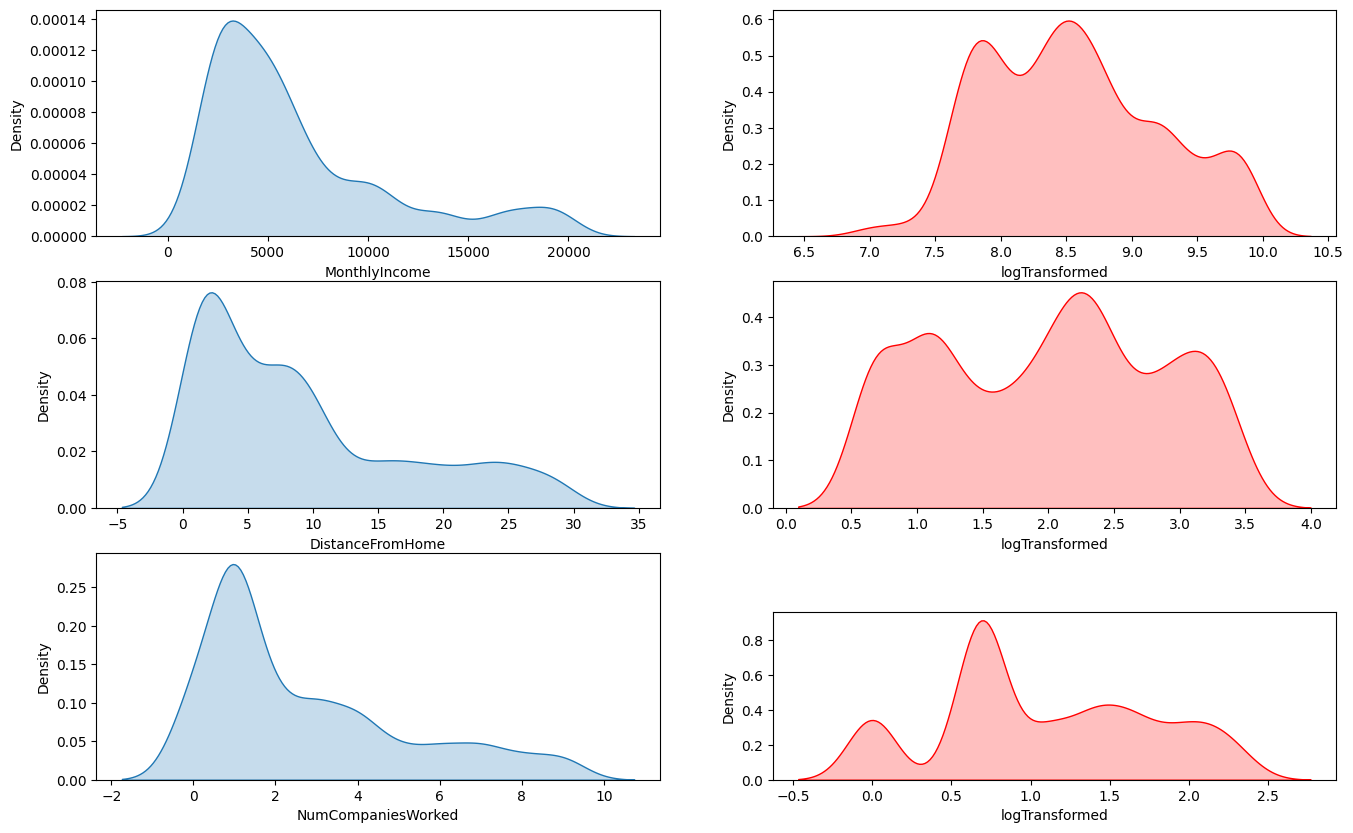

In [82]:
plt.figure(figsize=(16,10))
plt.subplot(3,2,1)
sns.kdeplot(Num_Cols['MonthlyIncome'],shade=True)

plt.subplot(3,2,2)
sns.kdeplot(np.log1p(Num_Cols['MonthlyIncome']),shade=True,color='red')
plt.xlabel('logTransformed')

plt.subplot(3,2,3)
sns.kdeplot(Num_Cols['DistanceFromHome'],shade=True)

plt.subplot(3,2,4)
sns.kdeplot(np.log1p(Num_Cols['DistanceFromHome']),shade=True,color='red')
plt.xlabel('logTransformed')

plt.subplot(3,2,5)
sns.kdeplot(Num_Cols['NumCompaniesWorked'],shade=True)

plt.subplot(4,2,8)
sns.kdeplot(np.log1p(Num_Cols['NumCompaniesWorked']),shade=True,color='red')
plt.xlabel('logTransformed')

plt.tight_layout()

The skewness in the columns is almost gone and now it will surely improve the peformance of our model especially if we use Linear Models

Making these changes Permanant...

In [83]:
data_model[['MonthlyIncome','DistanceFromHome','NumCompaniesWorked']].sample(3)

,MonthlyIncome,DistanceFromHome,NumCompaniesWorked
215,13591,6,3
567,6274,2,1
1202,3306,4,7


In [84]:
data_model['MonthlyIncome'] = np.log1p(data_model['MonthlyIncome'])
data_model['DistanceFromHome'] = np.log1p(data_model['DistanceFromHome'])
data_model['NumCompaniesWorked'] = np.log1p(data_model['NumCompaniesWorked'])

In [85]:
data_model[['MonthlyIncome','DistanceFromHome','NumCompaniesWorked']].sample(3)

,MonthlyIncome,DistanceFromHome,NumCompaniesWorked
174,8.518592,1.609438,1.609438
1039,7.916807,2.302585,0.693147
12,7.976595,3.295837,0.693147


It will not contribute in data leakage as it is a mathematical function that is done separately on the datapoints.
Moreover it does not learn anything from the data.

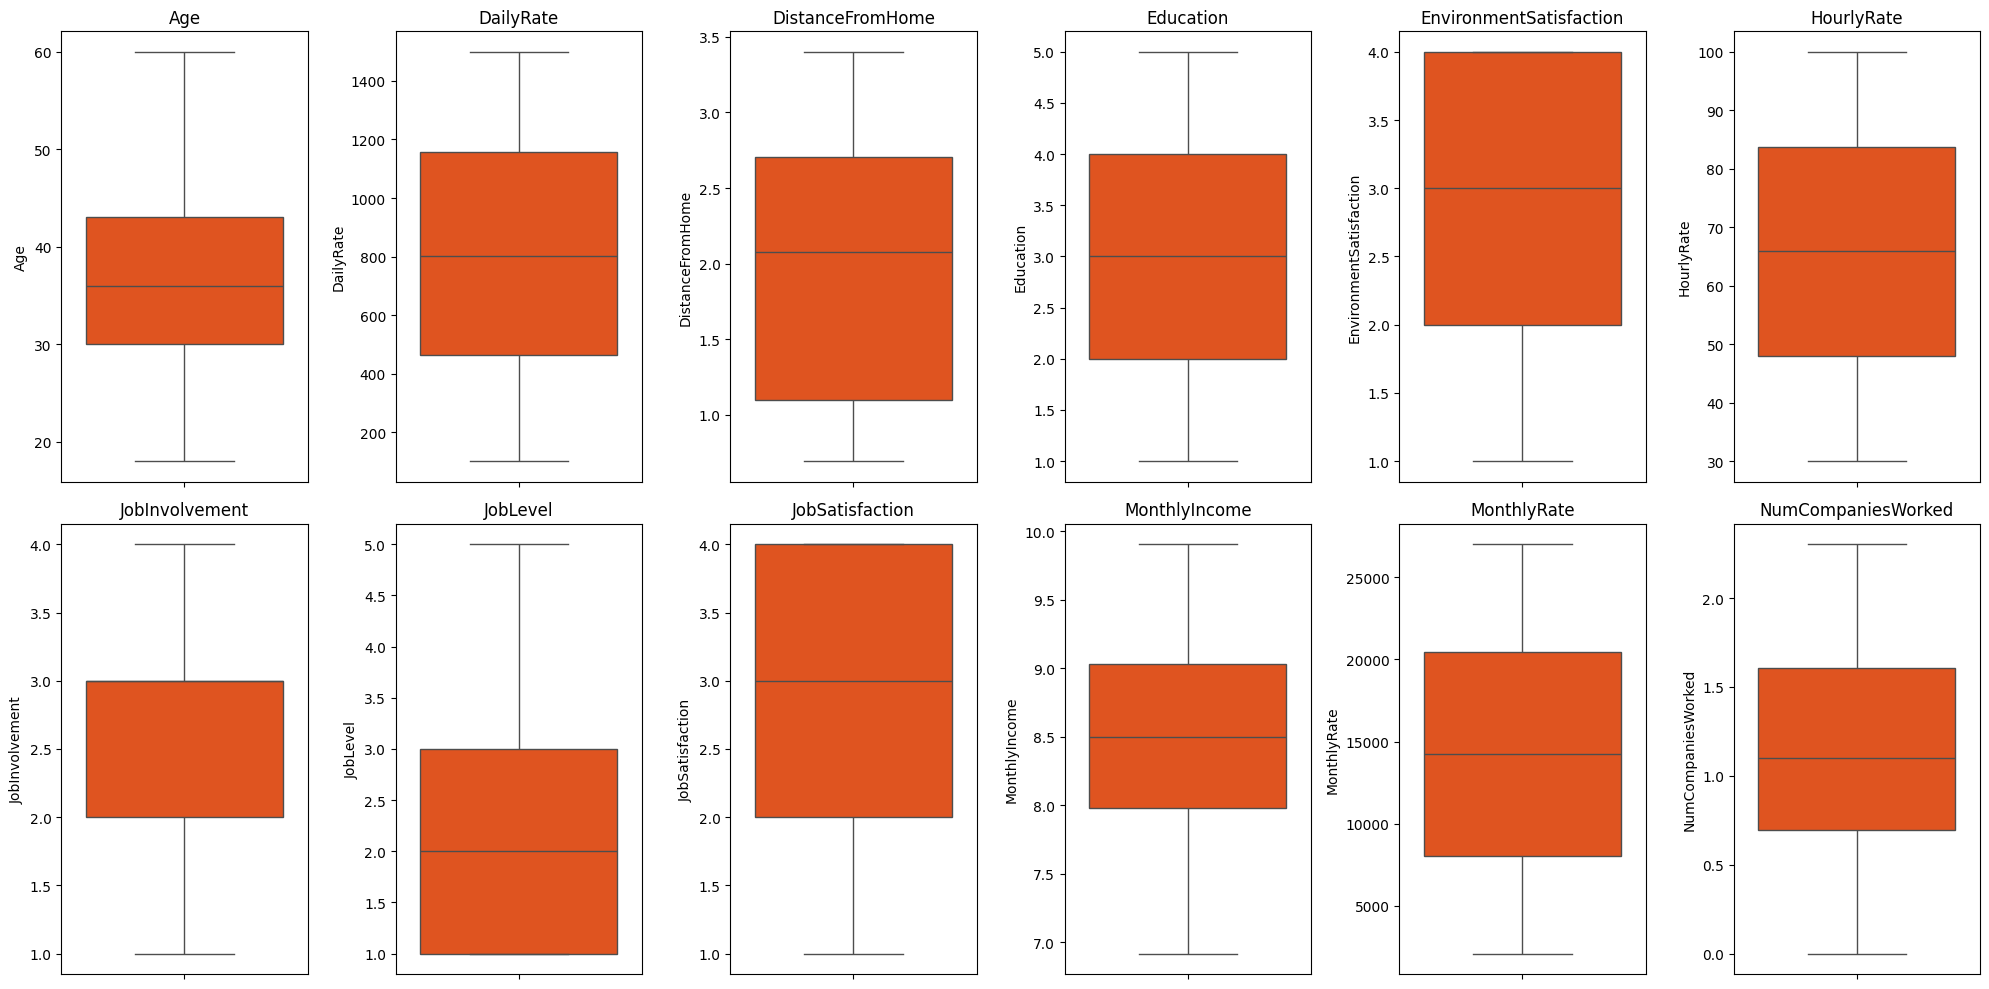

In [86]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index=0
ax=ax.flatten()


for col,value in data_model.select_dtypes(include='number').drop(columns=['Attrition']).items():
    if index >= 12:
        break
    sns.boxplot(value,ax=ax[index], color = 'orangered')
    ax[index].set_title(col)
    index+=1
    
plt.tight_layout()

There are no outliers in the dataset. Possibly due to Log Transformation. And we have every column almost Normally Distributed ( No Skewness ).

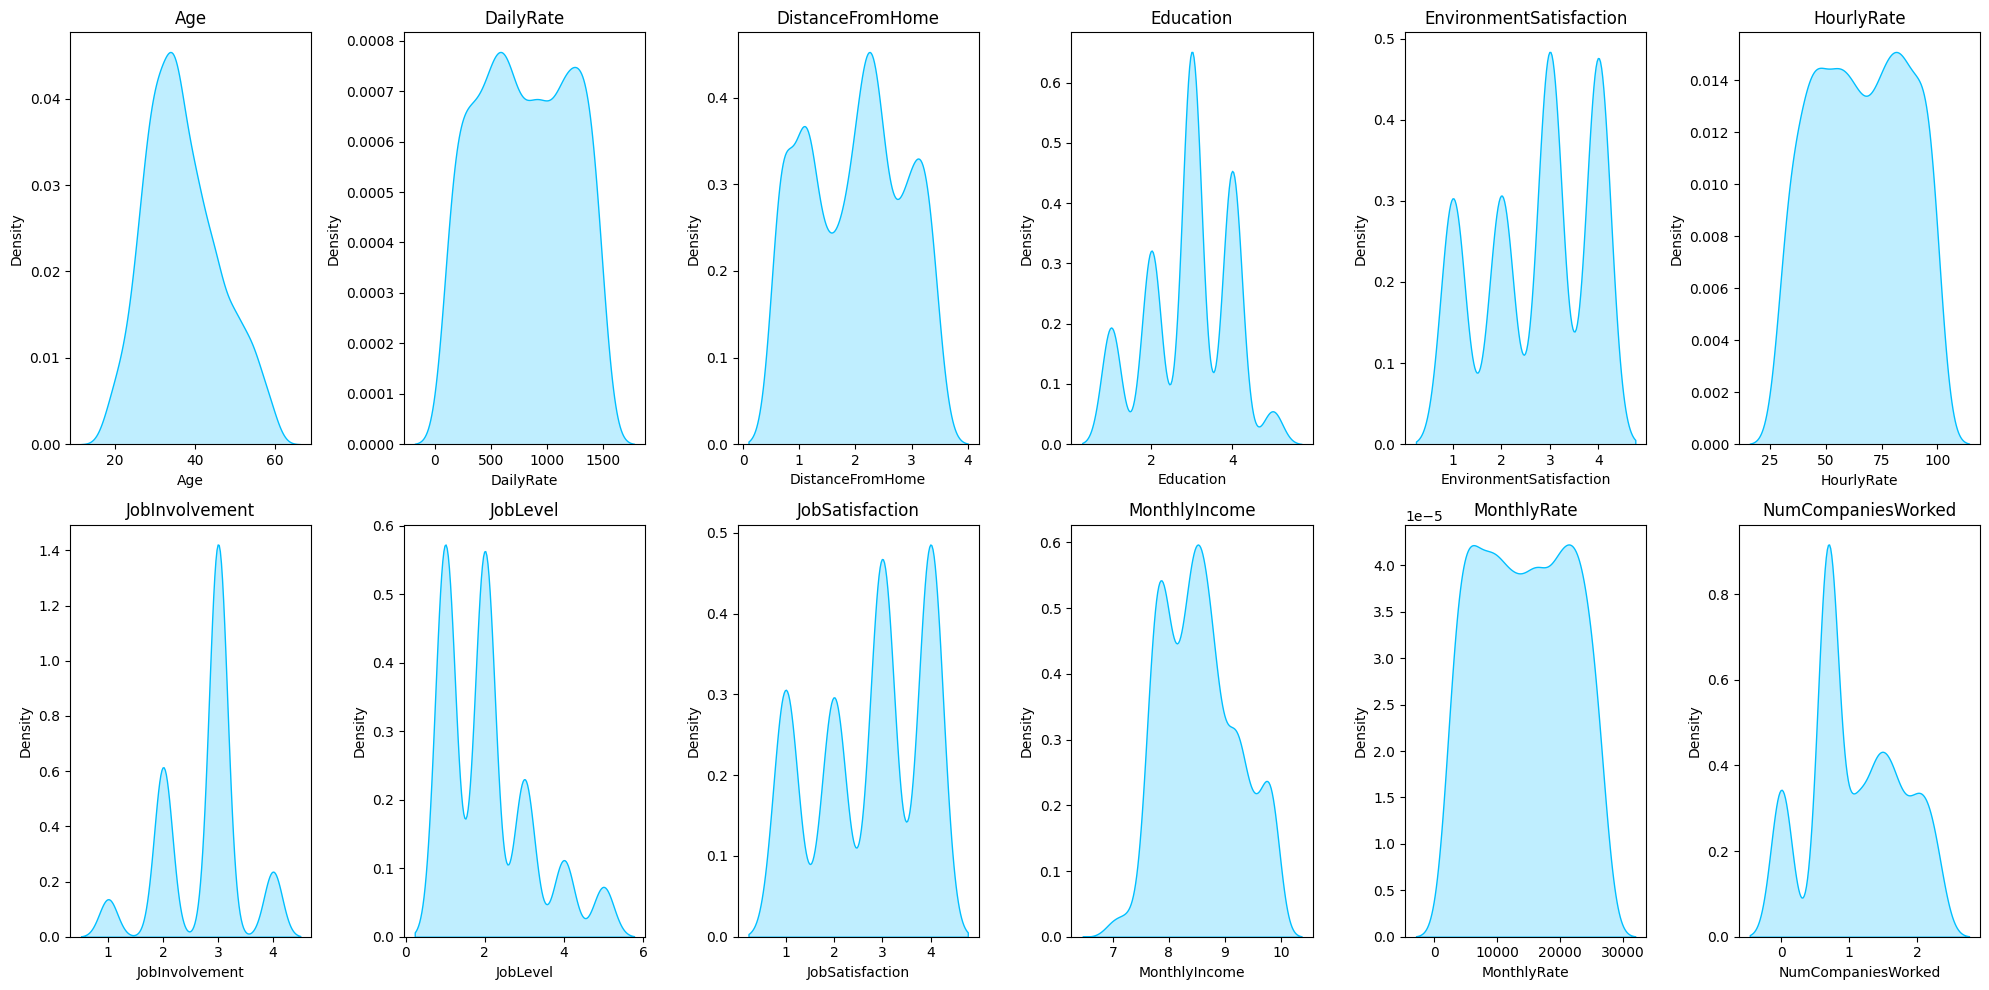

In [87]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index=0
ax=ax.flatten()


for col,value in data_model.select_dtypes(include='number').drop(columns=['Attrition']).items():
    if index >= 12:
        break
    sns.kdeplot(value,ax=ax[index], color = 'deepskyblue', shade = True)
    ax[index].set_title(col)
    index+=1
    
plt.tight_layout()

## Model Building

In [88]:





X = data_model.drop(columns=['Attrition'])
y = data_model[['Attrition']]


In [89]:

from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape,X_test.shape,y_train.shape,y_test.shape


((1176, 31), (294, 31), (1176, 1), (294, 1))

In [90]:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler


label = LabelEncoder()
ohe = OneHotEncoder(drop ='first')
scaler = StandardScaler()



y_train = label.fit_transform(y_train)
y_test = label.transform(y_test)


In [91]:
X.select_dtypes(include='object')

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Age_Bins
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes,39-48
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No,49-58
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes,29-38
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes,29-38
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No,18-28
...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No,29-38
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No,39-48
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes,18-28
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No,49-58


In [92]:
X.select_dtypes(include='object')

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Age_Bins
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes,39-48
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No,49-58
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes,29-38
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes,29-38
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No,18-28
...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No,29-38
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No,39-48
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes,18-28
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No,49-58


In [93]:


from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    
    ('ohe', ohe, X.select_dtypes(include='object').columns),
    ('scaler', scaler, X.select_dtypes(include='number').columns)
    
     ], remainder='passthrough')




Training Accuracy score -> Logistic Regression:  0.8979591836734694

Testing Accuracy Score -> Logistic Regression:  0.8850340136054423 

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       255
           1       0.63      0.44      0.52        39

    accuracy                           0.89       294
   macro avg       0.77      0.70      0.73       294
weighted avg       0.88      0.89      0.88       294



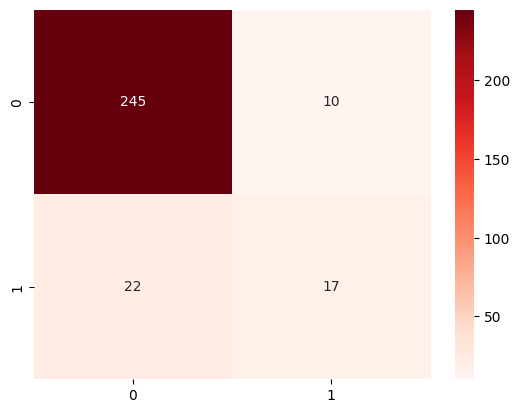

In [94]:


from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

pipe = Pipeline(steps=[
    ('prep',preprocessor),
    ('model',LogisticRegression())])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)




cv = cross_val_score(pipe,X,y,cv=7,scoring='accuracy')




print("Training Accuracy score -> Logistic Regression: ",pipe.score(X_train,y_train))


print("\nTesting Accuracy Score -> Logistic Regression: ", cv.mean(),"\n")





cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,cmap='Reds',fmt='.0f')

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


As we can see the model generalises well... But we know the model is heavily Imbalanced.

Recall for the Attrition =  1 is too low which we are actually interested in... As we need to detect the Attrited customers as early as possible. Possible reason for this could be the imbalanced data. Let's explore the results of Different Algoriths, and compare their accuracies...


One way we can increase the prescision of this model is by using the Hyperparameter: class_weight = 'balanced', that gives the less occuring class (Attrition = 1, in this case) more weightage.

In [95]:
data_model['Attrition'].value_counts()/data_model['Attrition'].value_counts().sum()*100

Attrition
0    83.877551
1    16.122449
Name: count, dtype: float64

<Axes: xlabel='Attrition', ylabel='count'>

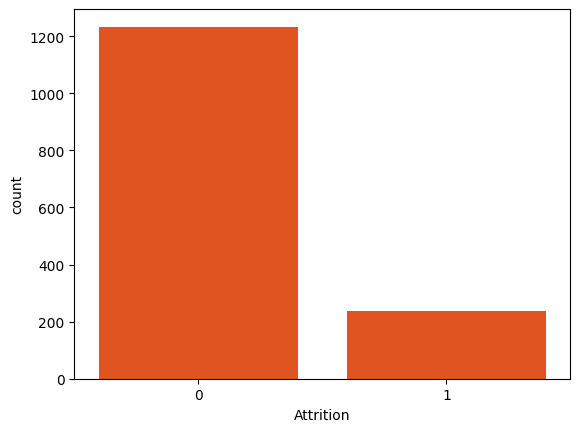

In [96]:
sns.barplot(data_model['Attrition'].value_counts(), color='orangered')

The Attrition rate for "Yes" is significantly Lower then the customers that have not Left the company. Only around 16% of the totaly employees have left the company. That is why the Recall of the Attritered customer comes out to be lower


Training Accuracy Score -> Decision Tree Classifier:  1.0

Testing Accuracy Score ->  Decision Tree Classifier: 0.8850340136054423 

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       255
           1       0.15      0.15      0.15        39

    accuracy                           0.77       294
   macro avg       0.51      0.51      0.51       294
weighted avg       0.77      0.77      0.77       294



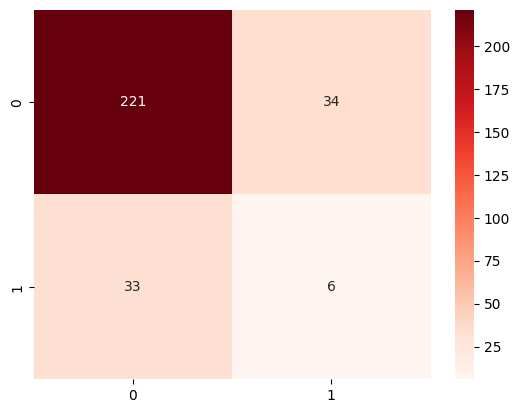

In [97]:
from sklearn.tree import DecisionTreeClassifier


pipe_dtc = Pipeline(steps=[
    ('prep',preprocessor),
    ('model',DecisionTreeClassifier())])

pipe_dtc.fit(X_train,y_train)

y_pred_dtc = pipe_dtc.predict(X_test)
accuracy_dtc = pipe_dtc.score(X_test, y_test)




cv_dtc = cross_val_score(pipe_dtc,X,y,cv=7,scoring='accuracy')

print("\nTraining Accuracy Score -> Decision Tree Classifier: ",pipe_dtc.score(X_train,y_train))


print("\nTesting Accuracy Score ->  Decision Tree Classifier:", cv.mean(),"\n")



cm = confusion_matrix(y_test, y_pred_dtc)
sns.heatmap(cm,annot=True,cmap='Reds',fmt='.0f')


print(classification_report(y_test, y_pred_dtc))

**Decision Tree performance is very poor compared to Logistic Regression**

Precision is very low in case of the Decision Tree classifier. We can see the Model is Overfitting and we will do the hyper parameter tuning after handling the Classs Imbalance

Training Accuracy score in case of Logistic Regression: 0.7967687074829932

So we got the Testing Accuracy Score of Logistic Regression: 0.7741496598639456
              precision    recall  f1-score   support

           0       0.93      0.79      0.86       255
           1       0.31      0.62      0.41        39

    accuracy                           0.77       294
   macro avg       0.62      0.70      0.63       294
weighted avg       0.85      0.77      0.80       294



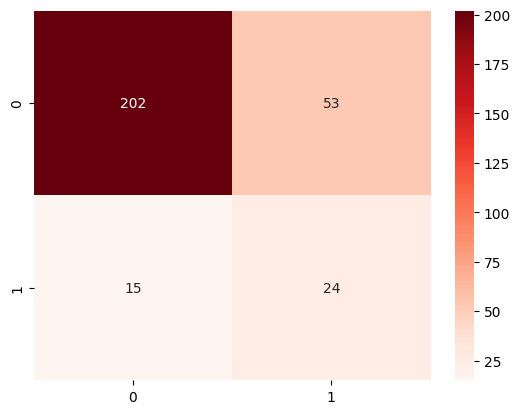

In [98]:
#          Using Class Weight


pipe = Pipeline(steps=[
    ('prep',preprocessor),
    ('model',LogisticRegression(class_weight= 'balanced'))])



cv = cross_val_score(pipe,X,y,cv=7,scoring='accuracy')


pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)


print("Training Accuracy score in case of Logistic Regression:",pipe.score(X_train,y_train))


print("\nSo we got the Testing Accuracy Score of Logistic Regression:", cv.mean())


cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm,annot=True,cmap='Reds',fmt='.0f')

print(classification_report(y_test, y_pred))

We can see an improvement in the recall score in case of Attrition =1 and a drastic depleation in precision score after applying the Class weight = Balanced...(that gives the Class with the lower value more significance)

Training Accuracy score in case of Balanced Random Forest Calssifier:  0.9574829931972789

So we got the Testing Accuracy Score of Balanced Random Forest Calssifier:  0.8258503401360543
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       255
           1       0.28      0.33      0.30        39

    accuracy                           0.80       294
   macro avg       0.59      0.60      0.59       294
weighted avg       0.81      0.80      0.80       294



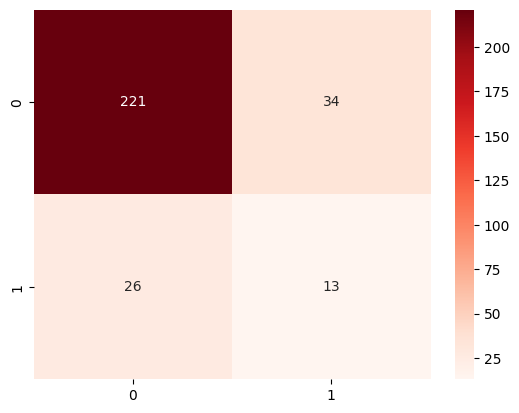

In [99]:
#          Balanced Random Forest Calssifier


from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier



pipe = Pipeline(steps=[
    ('prep',preprocessor),
    ('model',BalancedRandomForestClassifier(random_state=23))])



cv = cross_val_score(pipe,X,y,cv=7,scoring='accuracy')


pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)


print("Training Accuracy score in case of Balanced Random Forest Calssifier: ", pipe.score(X_train,y_train))


print("\nSo we got the Testing Accuracy Score of Balanced Random Forest Calssifier: ", cv.mean())


cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm,annot=True,cmap='Reds',fmt='.0f')

print(classification_report(y_test, y_pred))

BalancedRandomForestClassifier did manage to get overall f1 score better than Logistic Regression (Balanced)


We'll Apply SMOTE and check the results...

Training Accuracy score in case of Logistic Regression: 0.8197278911564626

So we got the Testing Accuracy Score of Logistic Regression: 0.791156462585034
              precision    recall  f1-score   support

           0       0.93      0.81      0.86       255
           1       0.32      0.59      0.41        39

    accuracy                           0.78       294
   macro avg       0.62      0.70      0.64       294
weighted avg       0.85      0.78      0.80       294



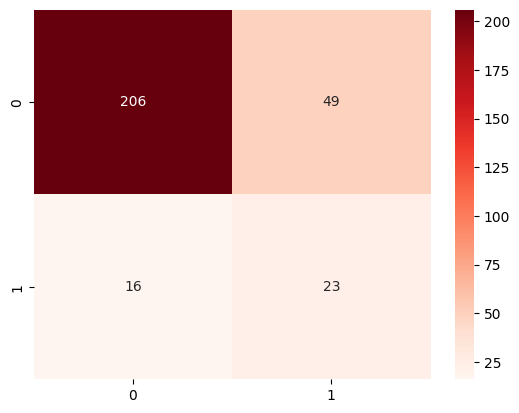

In [100]:


from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


pipeS = Pipeline(steps=[
    ('prep', preprocessor),
    ('smt', SMOTE()),
    ('LOR', LogisticRegression())
])

pipeS.fit(X_train,y_train)



y_predS = pipeS.predict(X_test)

cvS = cross_val_score(pipeS,X,y,cv=7,scoring='accuracy')


print("Training Accuracy score in case of Logistic Regression:",pipeS.score(X_train,y_train))


print("\nSo we got the Testing Accuracy Score of Logistic Regression:", cvS.mean())


cm = confusion_matrix(y_test, y_predS)

sns.heatmap(cm,annot=True,cmap='Reds',fmt='.0f')

print(classification_report(y_test, y_predS))






Using SMOTE and Logistic Regression, we got the overall best Score in order for us to prioritize the recall value more...

In [101]:
#   Using different Parameters:
from sklearn.model_selection import GridSearchCV

parameters = {
    "LOR__solver": ['liblinear', 'saga'],
    "LOR__penalty": ['l1','l2'],
    "LOR__max_iter": [100,150,200,250,300],
    "LOR__C": [0.01,0.1,1]
}


gsc = GridSearchCV(pipeS, param_grid=parameters, cv=3, scoring='accuracy')
gsc.fit(X_train,y_train)

print(gsc.best_params_)
print(gsc.best_score_)

{'LOR__C': 1, 'LOR__max_iter': 100, 'LOR__penalty': 'l2', 'LOR__solver': 'saga'}
0.7950680272108844


Let's see using these Parameters, is there any improvement in our metrics or not

Training Accuracy score in case of Logistic Regression: 0.8112244897959183

So we got the Testing Accuracy Score of Logistic Regression: 0.7802721088435375
              precision    recall  f1-score   support

           0       0.93      0.80      0.86       255
           1       0.32      0.62      0.42        39

    accuracy                           0.78       294
   macro avg       0.63      0.71      0.64       294
weighted avg       0.85      0.78      0.81       294



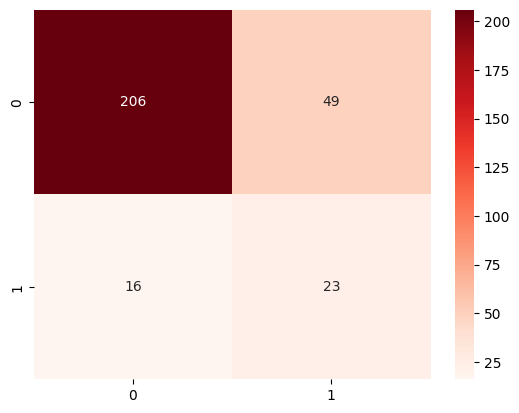

In [102]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


pipeS = Pipeline(steps=[
    ('prep', preprocessor),
    ('smt', SMOTE()),
    ('LOR', LogisticRegression(C=0.1, max_iter=250, penalty='l2',solver='saga'))
])

pipeS.fit(X_train,y_train)



y_predP = pipeS.predict(X_test)

cvS = cross_val_score(pipeS,X,y,cv=7,scoring='accuracy')


print("Training Accuracy score in case of Logistic Regression:",pipeS.score(X_train,y_train))


print("\nSo we got the Testing Accuracy Score of Logistic Regression:", cvS.mean())


cm = confusion_matrix(y_test, y_predS)

sns.heatmap(cm,annot=True,cmap='Reds',fmt='.0f')

print(classification_report(y_test, y_predP))






There is improvement in both Precision and Recall using these parameters

In [103]:
print("\n\nCalssification Report -> With Parameters:\n\n",classification_report(y_test, y_predS))

print("\n\nCalssification Report -> Without Parameters:\n\n",classification_report(y_test, y_predP))





Calssification Report -> With Parameters:

               precision    recall  f1-score   support

           0       0.93      0.81      0.86       255
           1       0.32      0.59      0.41        39

    accuracy                           0.78       294
   macro avg       0.62      0.70      0.64       294
weighted avg       0.85      0.78      0.80       294



Calssification Report -> Without Parameters:

               precision    recall  f1-score   support

           0       0.93      0.80      0.86       255
           1       0.32      0.62      0.42        39

    accuracy                           0.78       294
   macro avg       0.63      0.71      0.64       294
weighted avg       0.85      0.78      0.81       294



**These are the Overall best scores that we got in case of Detecting the Attrited Customers...***